# Diferenciación automática: Parte 2

### NOTA

Este notebook se iniciará en la clase y **debe** hacerse en equipo, con los *mismos miembros* que participaron en la "Tarea4.ipynb". La resolución completa de los ejercicios debe ser enviada como "Tarea5.ipynb".

## Funciones elementales

Lo que se logró en la clase pasada fue, esencialmente, tener una manera de obtener primeras
derivadas para cualquier función racional, esto es, cocientes de polinomios en una variable.

El siguiente paso es incluir más funciones a fin de ampliar la aplicabilidad de lo hecho la vez pasada, en particular a las funciones elementales: $\exp$, $\log$, etc.

In [1]:
type Dual{T<:Real}
        fun :: T
        der :: T
end

In [2]:
Dual(a, b) = Dual(promote(a,b)...)

Dual{T<:Real}

In [3]:
cdual(x_0) = Dual(x_0,0)

cdual (generic function with 1 method)

In [4]:
function xdual(x0)
    Dual(x0,1)
end

xdual (generic function with 1 method)

In [5]:
import Base: +, -, *, /, ^, ==, exp, log, cos, sin, tan, sinh

# Aqui se implementan los métodos necesarios para cada función

+(a::Dual, b::Dual) = Dual(a.fun + b.fun, a.der + b.der)
+(a::Dual, b::Real) = a+cdual(b)
+(b::Real, a::Dual) = a+cdual(b)
-(a::Dual, b::Dual) = Dual(a.fun - b.fun, a.der - b.der)
-(a::Dual, b::Real) = a-cdual(b)
-(b::Real, a::Dual) = cdual(b)-a
*(a::Dual, b::Dual) = Dual(a.fun * b.fun, a.fun*b.der+b.fun*a.der)
*(b::Real, a::Dual) = a*cdual(b)
*(a::Dual, b::Real) = a*cdual(b)
/(a::Dual, b::Dual) = Dual(a.fun/b.fun, (a.der-(a.fun/b.fun)*b.der)/b.fun)
/(a::Dual, b::Real) = a/cdual(b)
/(b::Real, a::Dual) = cdual(b)/a
^(a::Dual, b::Real) = Dual(a.fun^b, b*a.fun^(b-1)*a.der)
==(a::Dual, b::Dual) = a.fun == b.fun && a.der == b.der
exp(a::Dual) = abs(1,a)
log(a::Dual) = abs(2,a)
sin(a::Dual) = abs(3,a)
cos(a::Dual) = abs(4,a)
tan(a::Dual) = abs(5,a)
sinh(a::Dual) = abs(6,a)

    ^(Main.Dual, Real) at In[5]:17
is ambiguous with: 
    ^(Any, Integer) at intfuncs.jl:108.
To fix, define 
    ^(Main.Dual, Integer)
before the new definition.


sinh (generic function with 13 methods)

In [6]:
function abs(n::Int, a::Dual)
    funn = ["x->exp(x)", "x->log(x)", "x->sin(x)", "x->cos(x)", "x->tan(x)", "x->sinh(x)"]
    derr = ["x->exp(x)","x->1/x","x->cos(x)","x->-sin(x)","x->sec(x)^2","x->cosh(x)"]
    der = parse(derr[n])
    fun = parse(funn[n])
    ex = :( ($der)(x))
    exx = :( ($fun)(x))
    ex_ret  = :(asdf(x) =  $ex)
    exX_ret = :(asdff(x) = $exx)
    Dual(eval(exX_ret)(a.fun),a.der*eval(ex_ret)(a.fun))
end

abs (generic function with 1 method)

In [7]:
using Base.Test

In [8]:
@test log(xdual(1)) == Dual(log(1),1/1) # d/dx log(x) en x=1
@test exp(4xdual(4)) == Dual(exp(4*4),4*exp(16)) # d/dx e^4x en x = 4
@test exp(xdual(1)) == Dual(exp(1),exp(1)) # d/dx e^x en x = 1
@test sin(4xdual(2)) == Dual(sin(4*2),4*cos(4*2)) # d/dx sin(4x) en x=2
@test tan(4xdual(4.2)) == Dual(tan(4*4.2),4*sec(4*4.2)^2) # d/dx tan(4x) en x = 4.2
@test sinh(2xdual(1.5)) == Dual(sinh(2*1.5),2*cosh(2*1.5)) # d/dx sinh(2x) en x = 1.5

La extensión a estas funciones es elemental, y así por ejemplo tenemos:

\begin{eqnarray}
\exp[\vec{f}(x_0)] &=& \big( \exp(f_0),\, f'_0\exp(f_0) \,\big),\\
\log[\vec{f}(x_0)] &=& \big( \log(f_0),\, \frac{f'_0}{f_0} \,\big),\\
\sin[\vec{f}(x_0)] &=& \big( \sin(f_0),\, f'_0\cos(f_0) \,\big),\\
\cos[\vec{f}(x_0)] &=& \big( \cos(f_0),\, -f'_0\sin(f_0) \,\big),\\
\tan[\vec{f}(x_0)] &=& \big( \tan(f_0),\, f'_0\sec^2(f_0) \,\big),\\
\sinh[\vec{f}(x_0)] &=& \big( \sinh(f_0),\, f'_0\cosh(f_0) \,\big),\\
...\\
\end{eqnarray}

Vale la pena enfatizar que la regla de la cadena se utiliza en la segunda componente del 
lado derecho de estas ecuaciones.

## Ejercicio

Implementen las funciones relacionadas con potencias, exponenciales, logarítmos, las funciones trigonométricas y las hiperbólicas que tiene Julia definidas (ver la [documentación](http://julia.readthedocs.org/en/release-0.4/manual/mathematical-operations/#trigonometric-and-hyperbolic-functions)). La implementación debe incluir los tests adecuados. La manera en que implementen las cosas debe estar clara en el notebook "Tarea5.ipynb", pero toda la funcionalidad debe ser incluida en "AutomDiff.jl" al igual que en "runtests.jl"

**Hint:** Aprovechen las capacidades de Julia en metaprogramming.

## Ejercicio

Prueben su implementación calculando la derivada de $f(x) = \sin\Big(x^3 - \frac{2}{x^6}\Big)$
en $x_0 = 2$.

Dibujen, para $x_0 \in [1,5]$ la función $f'(x)$.

In [9]:
using PyPlot

In [10]:
sin(xdual(2)^3-2/xdual(2)^6)

Dual{Float64}(0.9934213368955197,-1.384934905523464)

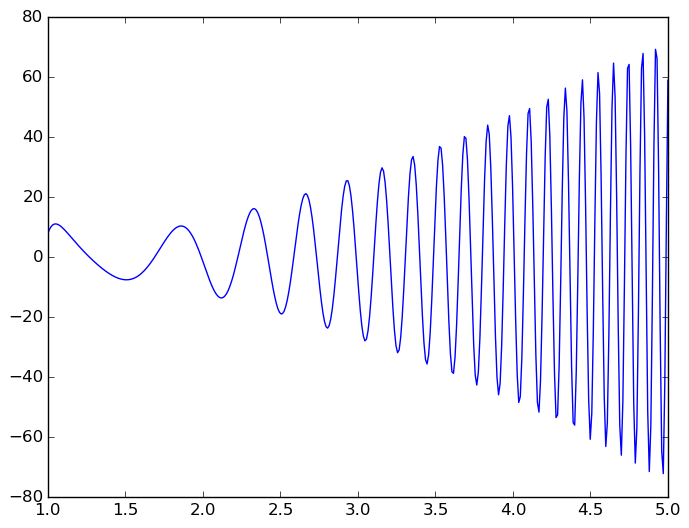

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f456a3f6310>

In [11]:
x = linspace(1,5,400)
juas = [sin(xdual(u)^3-2/xdual(u)^6).der for u in x]
plot(x,juas)

In [12]:
(387/32)*cos(255/32)

-1.384934905523464

El valor exacto es, segun [WolframAlpha](http://www.wolframalpha.com/input/?i=D[Sin[x^3-2%2Fx^6],x]%2F.x-%3E2), el obtenido.

# Ejercicio

Implementen el método de Newton para una función arbitraria $f(x)$ en una variable (la función `newton1D` debe tener un argumento que es una función) a fin de encontrar un cero de la función, i.e., $f(x^*)=0$. El método de Newton requiere la derivada evaluada en diversos puntos, cosa que obtendrán usando el módulo de derivación automática.

- Obtengan, usando su función del método de Newton, las raices del polinomio de Wilkinson $W_{6}(x)$, usando como iterados iniciales $x_0=2.2$ y $x_0=2.45$.
    
- Hagan lo mismo que en el inciso anterior para $g(x) = x \sin(2x)$, con $x_0=0.7$.

In [13]:
g(x) =  1 - x^2

g (generic function with 1 method)

In [14]:
x0 = .5

0.5

In [15]:
x0=x0-g(x0)/g(xdual(x0)).der

1.25

In [16]:
nombre(n::Int) = symbol( string("W_", n) )

nombre (generic function with 1 method)

In [17]:
function wilki(n::Int)
    # Checo que `n` sea >= 1
    @assert n >= 1
    
    ex = :(x-1)
    for i = 2:n
        ex = :( ($ex) * ( x-$i) )
    end
    ex_ret = :( $(nombre(n))(x) = $ex )
    ex_ret
end

wilki (generic function with 1 method)

In [18]:
willys = eval(wilki(6))

W_6 (generic function with 1 method)

In [19]:
willys(3)

0

In [20]:
x0 = 2.2

2.2

In [21]:
x0=x0-willys(x0)/willys(xdual(x0)).der

1.906527735212994

In [22]:
x0 = 2.45

2.45

In [23]:
x0=x0-willys(x0)/willys(xdual(x0)).der

6.888275882869115

In [24]:
f(x) = x*sin(2x)

f (generic function with 1 method)

In [25]:
x0 = .7

0.7

In [26]:
x0=x0-f(x0)/f(xdual(x0)).der

0.13615112979555188

In [27]:
function newton(adivinanza, funcion)
    for i in 1:20
        adivinanza = adivinanza - funcion(adivinanza)/funcion(xdual(adivinanza)).der
    end
    adivinanza
end

newton (generic function with 1 method)

In [28]:
newton(2.2, x->willys(x))

2.0

In [29]:
newton(2.45, x->willys(x))

6.0

In [30]:
newton(2.45, x->f(x))

-32.98672286269283

In [31]:
newton(.7, x->f(x))

2.5539099419345546e-7

# Pregunta

¿Qué hacer si se requieren derivadas de orden superior, es decir, la segunda, tercera, etc, derivada? Argumenten.

**NOTA:** Esta pregunta debe ser contestada pero **no** será considerada para aceptar la tarea; la idea es empezar a pensar en esto.

Como vamos a necesitar las derivadas anteriores, es probable que se defina un vector n-dimensional en el que la primera entrada sea la función evaluada, la segunda entrada identificada con segunda la segunda derivada y así.